## Loading libraries and data

In [96]:
import pandas as pd
import numpy as np

In [97]:
df = pd.read_csv('insurance.csv')

In [98]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Reducing dataset size (downcasting) and saving to binary file

In [100]:
def downcast_dtypes(df):
  _start = df.memory_usage(deep=True).sum() / 1024 ** 2
  float_cols = [c for c in df if df[c].dtype == 'float64']
  int_cols = [c for c in df if df[c].dtype in ['int32', 'int64']]
  df[float_cols] = df[float_cols].astype(np.float32)
  df[int_cols] = df[int_cols].astype(np.int16)
  _end = df.memory_usage(deep=True).sum() / 1024 ** 2
  saved = (_start - _end) / _start * 100
  print(f"Saved {saved:.2f}%")
  return df

In [101]:
df = downcast_dtypes(df)

Saved 9.12%


In [102]:
df.to_parquet("data.parquet.gzip", compression="gzip")

## Checking for missing data

In [103]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Checking for duplicated rows

In [104]:
df[df.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.56311
581,19,male,30.59,0,no,northwest,1639.56311


In [105]:
df.shape

(1338, 7)

In [106]:
# there are two identical rows -> dropping one of them
df = df.drop_duplicates()

In [107]:
df.shape

(1337, 7)

## Examining categorical data

In [108]:
# checking categorical data if there isn't anything wrong
from pandas.api.types import is_string_dtype
string_columns = [column for column in df.columns if is_string_dtype(df[column])]
string_columns

['sex', 'smoker', 'region']

In [109]:
for column in string_columns:
  print(column+":", df[column].unique())

# all looks good

sex: ['female' 'male']
smoker: ['yes' 'no']
region: ['southwest' 'southeast' 'northwest' 'northeast']


In [125]:
import seaborn as sns
sns.set_theme(palette="muted")

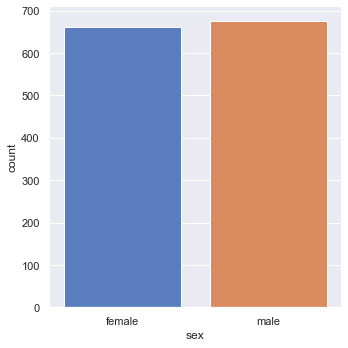

In [126]:
sns.catplot(x='sex', kind="count", data=df)

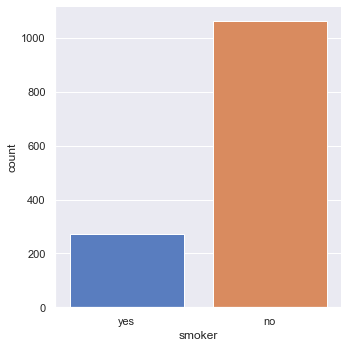

In [127]:
sns.catplot(x='smoker', kind="count", data=df)

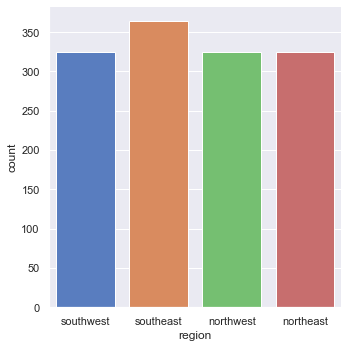

In [128]:
sns.catplot(x='region', kind="count", data=df)

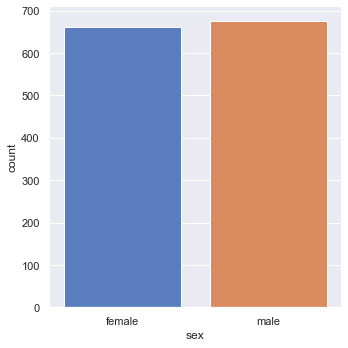

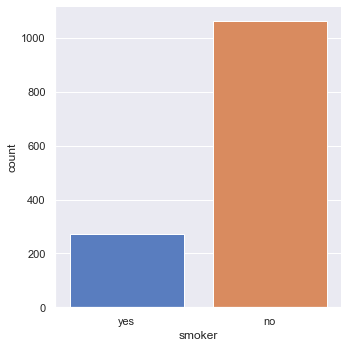

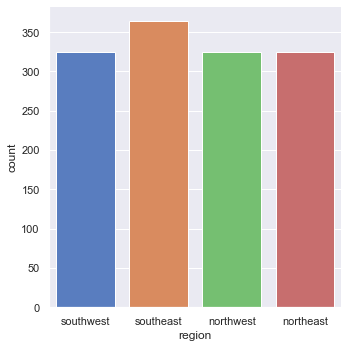

In [129]:
[sns.catplot(x=column, kind="count", data=df) for column in string_columns]

## Examining numerical data

In [130]:
# checking categorical data if there isn't anything wrong
from pandas.api.types import is_float_dtype, is_integer_dtype
num_columns = [column for column in df.columns if is_float_dtype(df[column]) or is_integer_dtype(df[column])]
num_columns

['age', 'bmi', 'children', 'charges']

In [131]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900000,0,yes,southwest,16884.923828
1,18,male,33.770000,1,no,southeast,1725.552246
2,28,male,33.000000,3,no,southeast,4449.461914
3,33,male,22.705000,0,no,northwest,21984.470703
4,32,male,28.879999,0,no,northwest,3866.855225


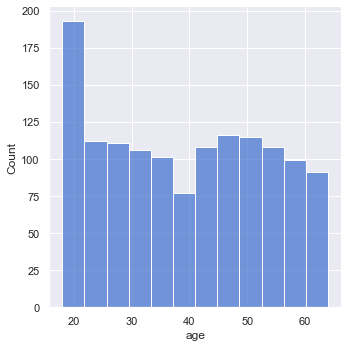

In [132]:
sns.displot(df, x="age")

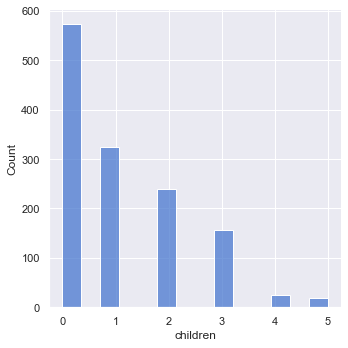

In [134]:
sns.displot(df, x="children")

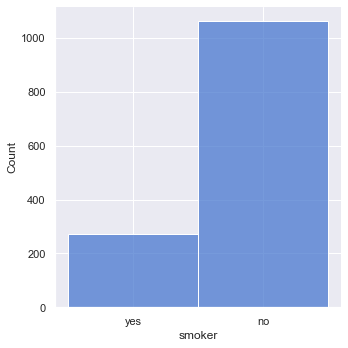

In [135]:
sns.displot(df, x="smoker")

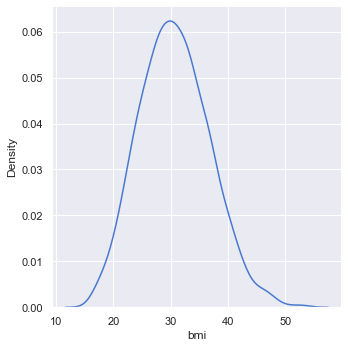

In [141]:
sns.displot(df, x="bmi", kind="kde")

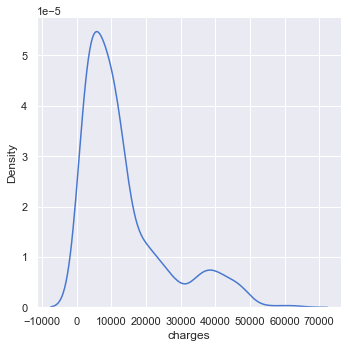

In [139]:
sns.displot(df, x="charges", kind="kde")

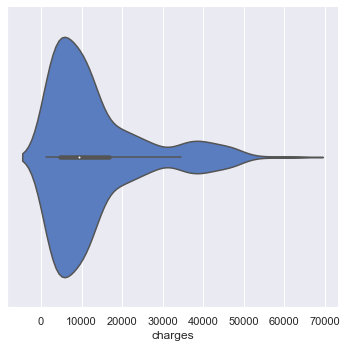

In [156]:
sns.catplot(data=df, x='charges', kind="violin")

In [157]:
df.to_parquet("data_cleaned.parquet.gzip", compression="gzip")